2022-02-08 13:15:16 hello start exam.01!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
Exploratory Data Analysis (EDA). It took a long time...(a couple of minutes)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


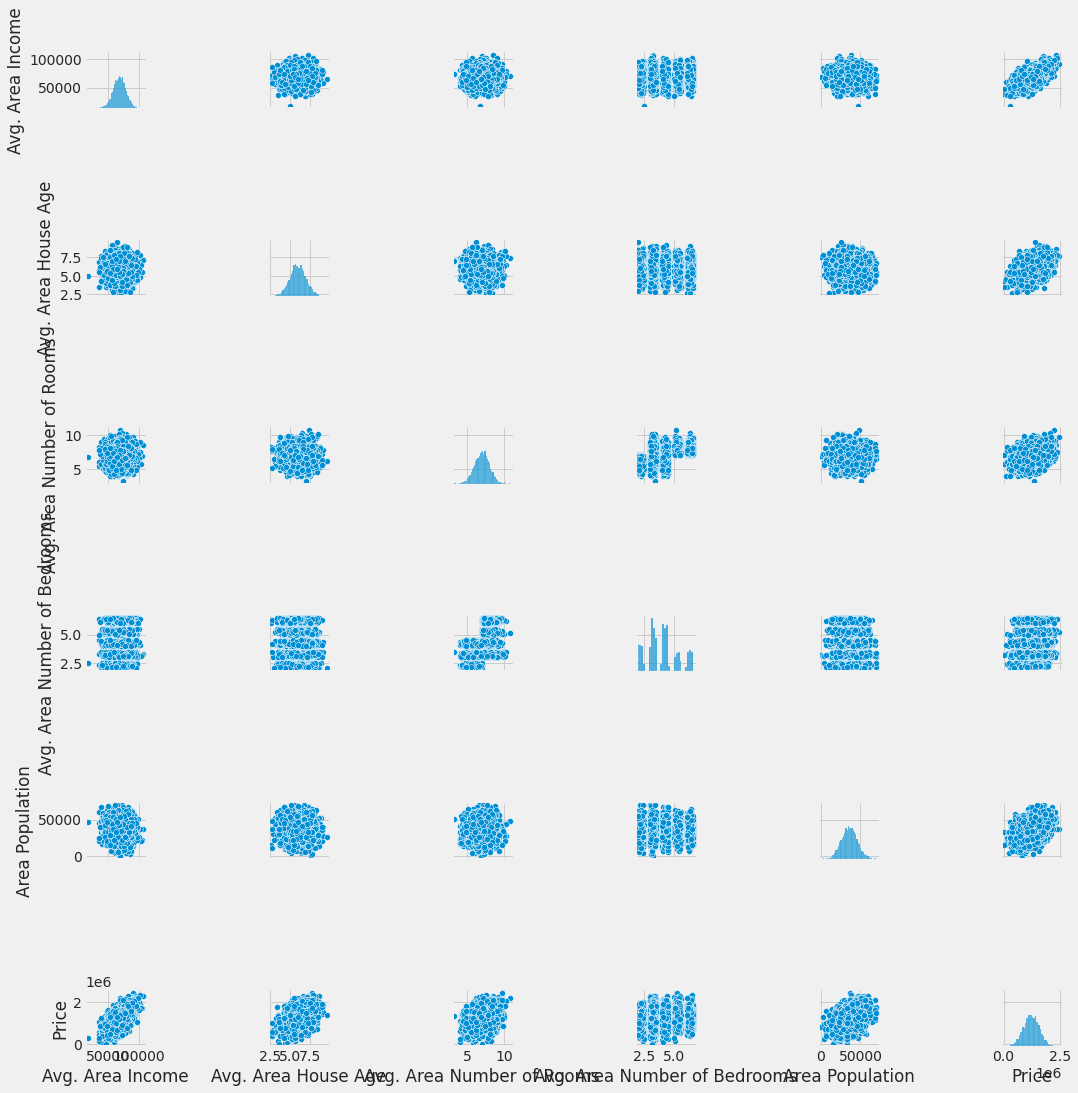

<Figure size 432x288 with 0 Axes>

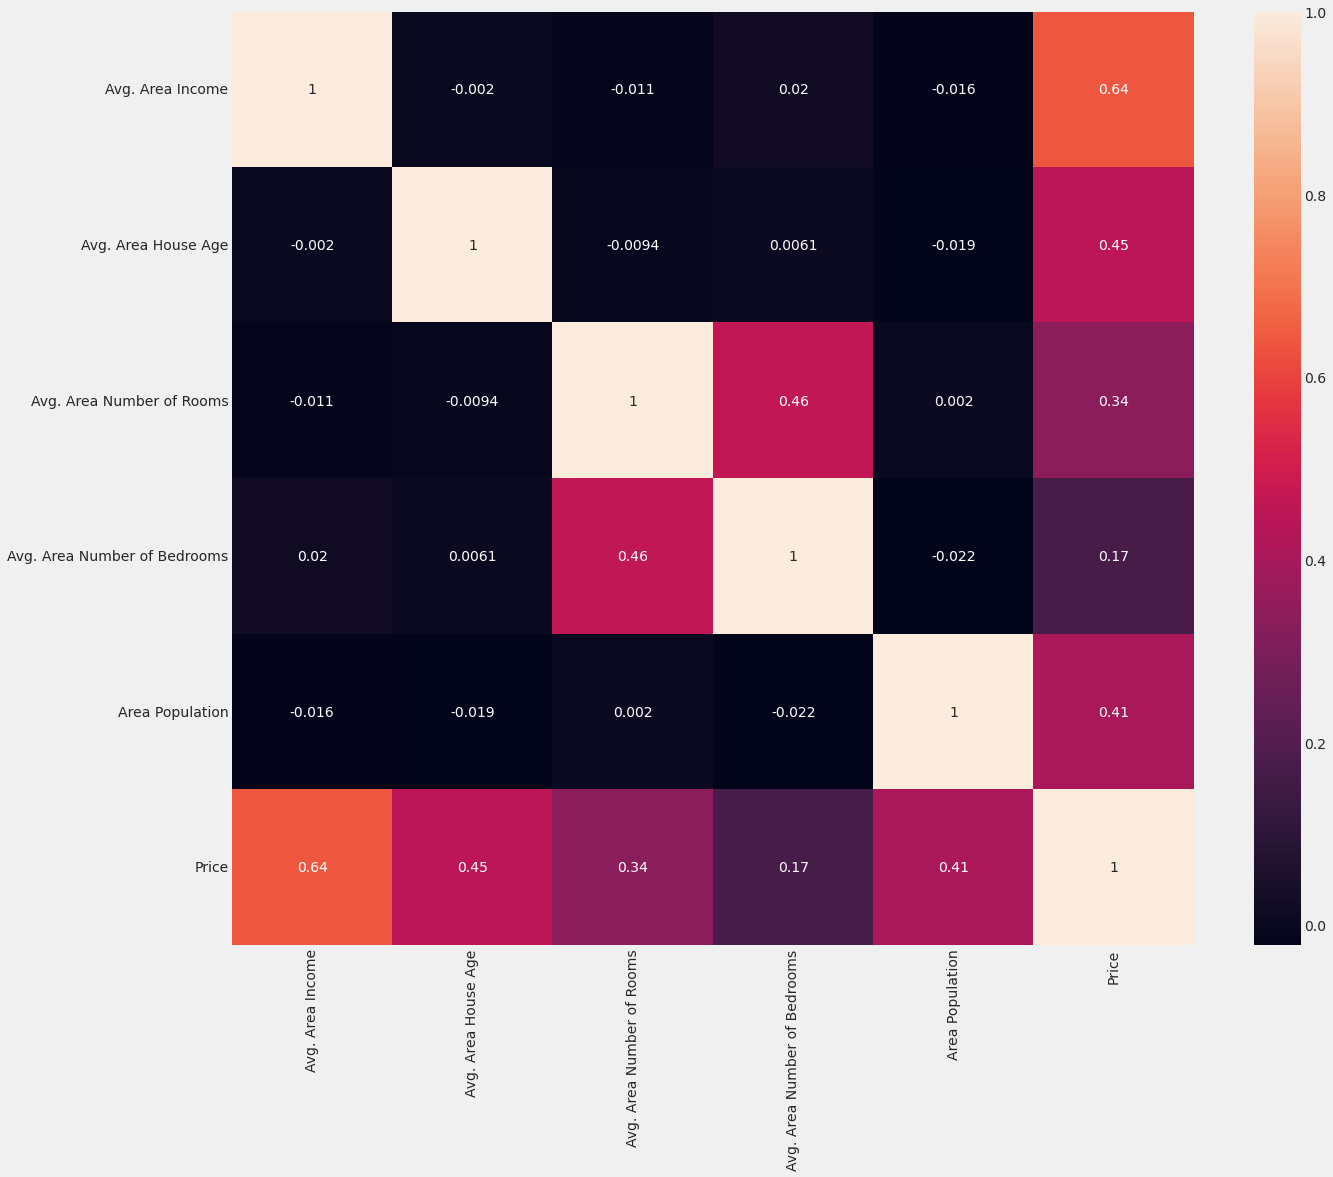

Training a Linear Regression Model
1. LinearRegression
lin_reg.intercept_ 1228219.149247
coeff_df                                 Coefficient
Avg. Area Income              232679.724646
Avg. Area House Age           163841.046593
Avg. Area Number of Rooms     121110.555476
Avg. Area Number of Bedrooms    2892.815121
Area Population               151252.342376
Test set evaluation LinearRegression:
_____________________________________
MAE: 81135.56608241773
MSE: 10068422549.495707
RMSE: 100341.52953536091
R2 Square 0.9146818498916266
__________________________________
Train set evaluation LinearRegression:
_____________________________________
MAE: 81480.49973197478
MSE: 10287043161.696651
RMSE: 101425.06180277462
R2 Square 0.9192986579053273
__________________________________
2. RANSACRegressor
Test set evaluation RANSACRegressor:
_____________________________________
MAE: 81273.90539283755
MSE: 10145847414.605734
RMSE: 100726.5973544512
R2 Square 0.9140257643696788
___________________

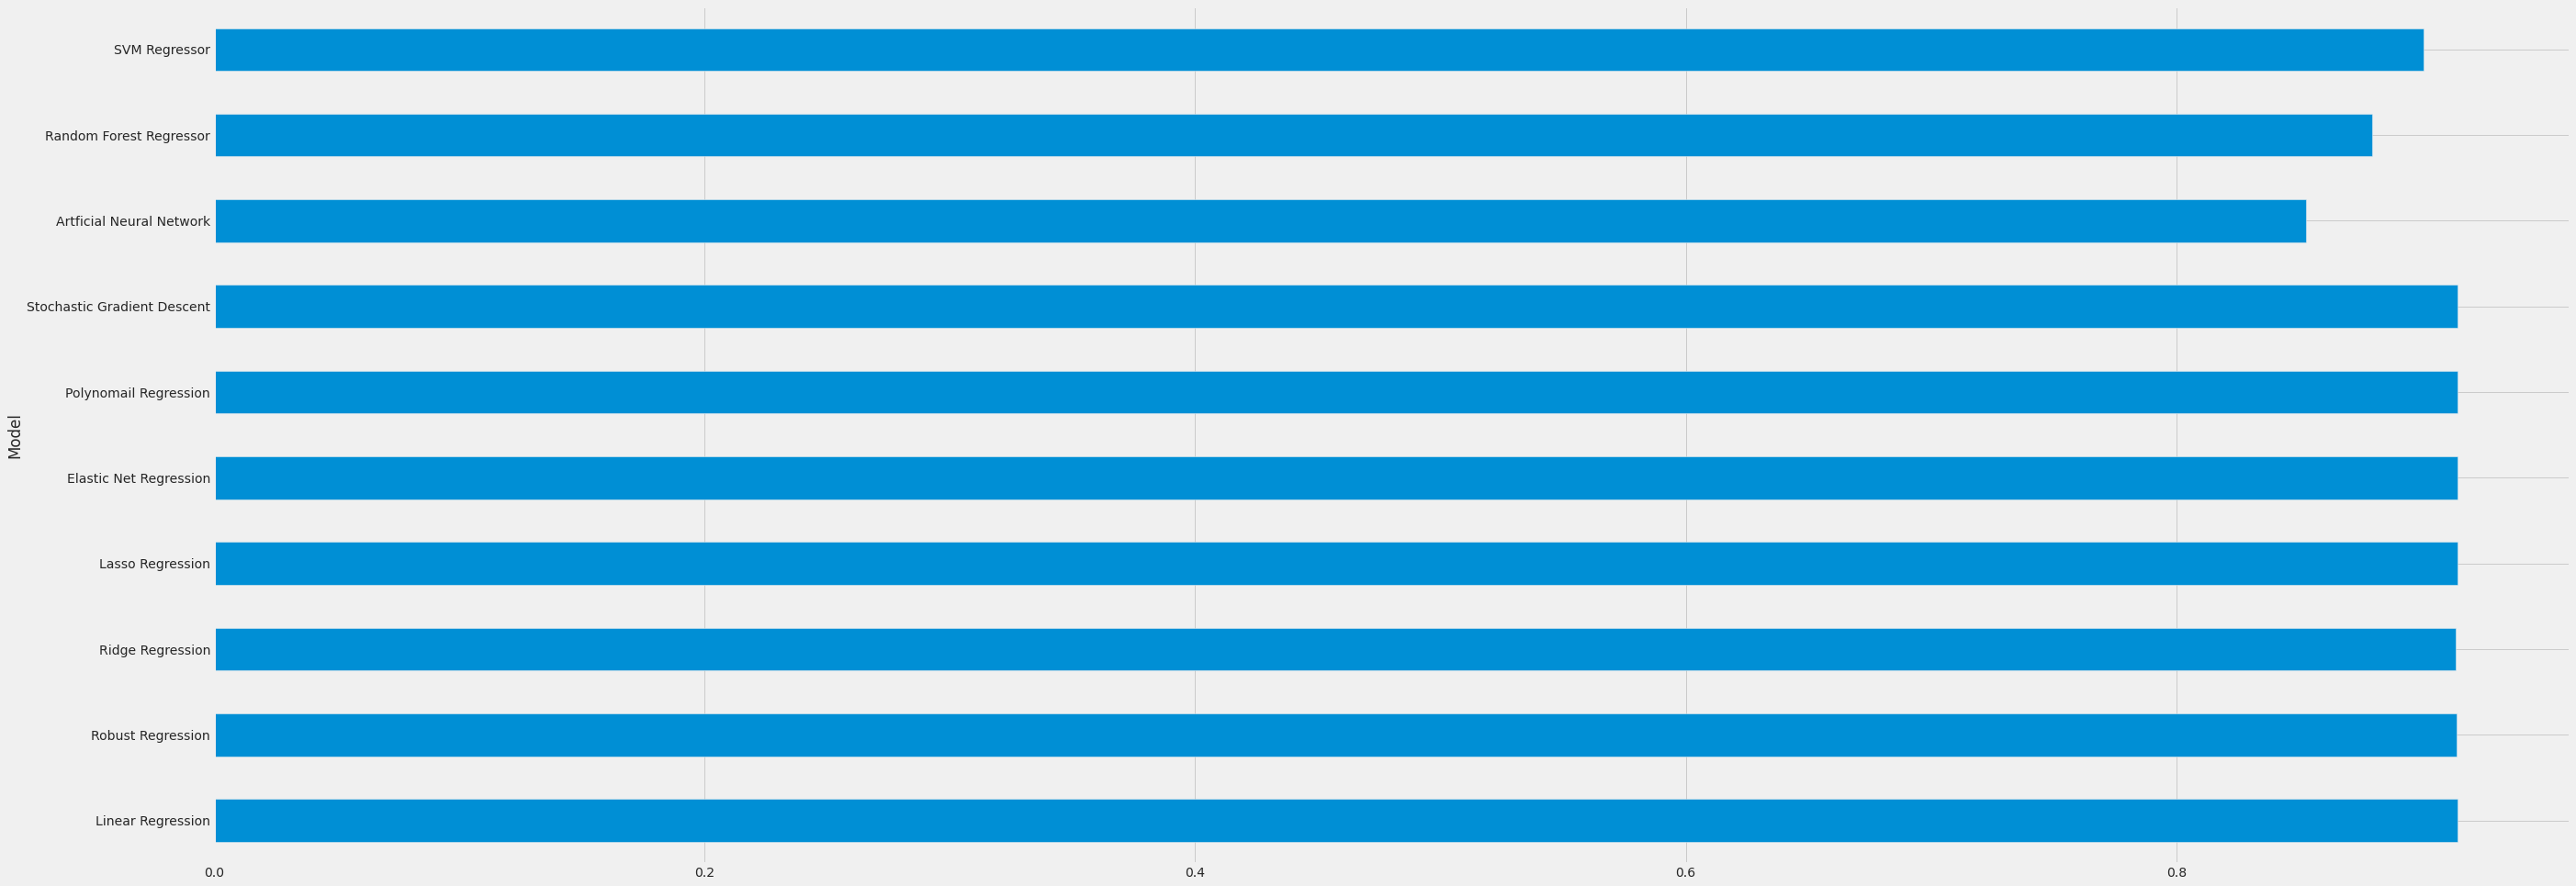

2022-02-08 13:40:43 hello stop exam.01!


In [4]:
# %matplotlib inline
# this line does not work in console application(it is designed for Jupyter IPython notebook)

# uninstall if it's required
# pip uninstall numpy scipy scikit-learn pandas hvplot seaborn matplotlib tensorflow

# install packages
# pip install --force --no-binary "whl/scikit_learn-1.0.2-cp310-cp310-win_amd64.whl" scikit-learn
# pip install pandas hvplot seaborn matplotlib tensorflow

import numpy as np
import pandas as pd
try:
    import hvplot.pandas
except:
    !pip install -U hvplot
    import hvplot.pandas

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

from datetime import datetime

#########|First config|#########

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


def todate():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")


# 2022-02-04 17:52:44
# 2022-02-04 18:04:36
print(todate(), "hello start exam.01!")

house_df = None

try:
    house_df = pd.read_csv("data/USA_Housing.csv")
except:
    house_df = pd.read_csv("https://gitlab.com/lyhoangnam/ai-nc01/-/raw/exam/data/USA_Housing.csv?inline=false")

house_df.head()
house_df.info()
house_df.describe()
house_df.columns


#########|Exploratory Data Analysis (EDA)|#########

print("Exploratory Data Analysis (EDA). It took a long time...(a couple of minutes)")
sns.pairplot(house_df)
try:
    plt.savefig("output/exam.01/chart/01. seaborn.pairplot.png")
except:
    plt.show()



hvplotPrice02 = house_df.hvplot.hist(by="Price", subplots=False, width=1000)
try:
    hvplot.save(hvplotPrice02, "output/exam.01/chart/02. hvplot.hist.price.01.html")
except:
    hvplotPrice02


hvplotPrice03 = house_df.hvplot.hist("Price")
try:
    hvplot.save(hvplotPrice03, "output/exam.01/chart/03. hvplot.hist.price.02.html")
except:
    hvplotPrice03


hvplotPrice04 = house_df.hvplot.scatter(x="Avg. Area House Age", y="Price")
try:
    hvplot.save(hvplotPrice04, "output/exam.01/chart/04. scatter.house.age.price.html")
except:
    hvplotPrice04


hvplotPrice05 = house_df.hvplot.scatter(x="Avg. Area Income", y="Price")
try:
    hvplot.save(hvplotPrice05, "output/exam.01/chart/05. scatter.income.price.html")
except:
    hvplotPrice05


plt.figure().clear()
plt.figure(figsize=(19.20, 16))
sns.heatmap(house_df.corr(), annot=True)
try:
    plt.savefig("output/exam.01/chart/06. heatmap.png")
except:
    plt.show()


#########|Test with house_data.csv|#########

# arrColumns = [
#     "sqft_living", "bedrooms", "bathrooms", "sqft_lot", "floors", "condition",
#     "grade", "sqft_above", "sqft_basement", "yr_built", "lat", "sqft_living15",
#     "sqft_lot15"
# ]
# for colName in arrColumns:
#     imgPath = "output/exam.01/chart/price-{colName}.png".format(colName=colName)
#     print("draw: {imgPath}".format(imgPath=imgPath))
#     house_df.plot.scatter(colName, "price")  # plt.show()
#     plt.savefig(imgPath)

#########|1. Training a Linear Regression Model|#########

print("Training a Linear Regression Model")

X = house_df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms",
              "Avg. Area Number of Bedrooms", "Area Population"]]
y = house_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()


def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Square", r2_square)
    print("__________________________________")


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


columns = ["Model", "MAE", "MSE", "RMSE", "R2 Square", "Cross Validation"]


pipeline = Pipeline([("std_scalar", StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# normalize=True was deprecated # # lin_reg = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
print("1. LinearRegression")

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print("lin_reg.intercept_", lin_reg.intercept_)


coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=["Coefficient"])
print("coeff_df", coeff_df)


pred = lin_reg.predict(X_test)
hvplotPrice07 = pd.DataFrame({"True Values": y_test, "Predicted Values": pred}).hvplot.scatter(
    x="True Values", y="Predicted Values")
try:
    hvplot.save(hvplotPrice07, "output/exam.01/chart/07. predicted.html")
except:
    hvplotPrice07


hvplotPrice08 = pd.DataFrame({"Error Values": (y_test - pred)}).hvplot.kde()
try:
    hvplot.save(hvplotPrice08, "output/exam.01/chart/08. error.values.html")
except:
    hvplotPrice08


test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)


print("Test set evaluation LinearRegression:\n_____________________________________")
print_evaluate(y_test, test_pred)
print("Train set evaluation LinearRegression:\n_____________________________________")
print_evaluate(y_train, train_pred)


results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(
    y_test, test_pred), cross_val(LinearRegression())]], columns=columns)


#########|2. RANSACRegressor|#########

print("2. RANSACRegressor")
model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)


test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


print("Test set evaluation RANSACRegressor:\n_____________________________________")
print_evaluate(y_test, test_pred)
print("====================================")
print("Train set evaluation RANSACRegressor:\n_____________________________________")
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(
    y_test, test_pred), cross_val(RANSACRegressor())]], columns=columns)
# # results_df = results_df.append(results_df_2, ignore_index=True)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


#########|3. Ridge|#########

print("3. Ridge")


model = Ridge(alpha=100, solver="cholesky", tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)


test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


print("Test set evaluation Ridge:\n_____________________________________")
print_evaluate(y_test, test_pred)
print("====================================")
print("Train set evaluation Ridge:\n_____________________________________")
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(
    data=[["Ridge Regression", *evaluate(y_test, test_pred), cross_val(Ridge())]], columns=columns)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


#########|4. Lasso|#########

print("4. Lasso")


model = Lasso(alpha=0.1,
              precompute=True,
              # warm_start=True,
              positive=True,
              selection="random",
              random_state=42)
model.fit(X_train, y_train)


test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


print("Test set evaluation Lasso:\n_____________________________________")
print_evaluate(y_test, test_pred)
print("====================================")
print("Train set evaluation Lasso:\n_____________________________________")
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred), cross_val(Lasso())]],
                            columns=columns)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


#########|5. ElasticNet|#########

print("5. ElasticNet")


model = ElasticNet(alpha=0.1, l1_ratio=0.9,
                   selection="random", random_state=42)
model.fit(X_train, y_train)


test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


print("Test set evaluation ElasticNet:\n_____________________________________")
print_evaluate(y_test, test_pred)
print("====================================")
print("Train set evaluation ElasticNet:\n_____________________________________")
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(
    y_test, test_pred), cross_val(ElasticNet())]], columns=columns)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


#########|6. PolynomialFeatures|#########

print("6. PolynomialFeatures")


poly_reg = PolynomialFeatures(degree=2)


X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)


lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d, y_train)


test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)


print("Test set evaluation PolynomialFeatures:\n_____________________________________")
print_evaluate(y_test, test_pred)
print("====================================")
print("Train set evaluation PolynomialFeatures:\n_____________________________________")
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(
    data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], columns=columns)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


#########|7. SGDRegressor|#########

print("7. SGDRegressor")


sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None,
                       eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)


test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)


print("Test set evaluation SGDRegressor:\n_____________________________________")
print_evaluate(y_test, test_pred)
print("====================================")
print("Train set evaluation SGDRegressor:\n_____________________________________")
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(
    data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], columns=columns)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


#########|tensorflow|#########

print("8. tensorflow")


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


model = Sequential()
model.add(Dense(X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.2))


model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.2))


model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.2))


model.add(Dense(512, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1))


model.compile(optimizer=Adam(0.00001), loss="mse")


r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              batch_size=1,
              epochs=100)


hvplotPrice09 = pd.DataFrame({"True Values": y_test, "Predicted Values": pred}).hvplot.scatter(
    x="True Values", y="Predicted Values")
try:
    hvplot.save(hvplotPrice09, "output/exam.01/chart/09. scatter.tensorflow.model.html")
except:
    hvplotPrice09


rh = pd.DataFrame(r.history)
print("r.history", rh)


hvplotPrice10 = rh.hvplot.line(y=["loss", "val_loss"])
try:
    hvplot.save(hvplotPrice10, "output/exam.01/chart/10. scatter.tensorflow.history.html")
except:
    hvplotPrice10



test_pred = model.predict(X_test)
train_pred = model.predict(X_train)


print("Test set evaluation tensorflow.Sequential:\n_____________________________________")
print_evaluate(y_test, test_pred)


print("Train set evaluation tensorflow.Sequential:\n_____________________________________")
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(
    data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], columns=columns)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


#########|9. RandomForestRegressor|#########

print("9. RandomForestRegressor")


rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)


test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


print("Test set evaluation RandomForestRegressor:\n_____________________________________")
print_evaluate(y_test, test_pred)


print("Train set evaluation RandomForestRegressor:\n_____________________________________")
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(
    data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], columns=columns)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)



#########|10. Support Vector Machine|#########

print("10. Support Vector Machine")


svm_reg = SVR(kernel="rbf", C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)


test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print("Test set evaluation:\n_____________________________________")
print_evaluate(y_test, test_pred)


print("Train set evaluation:\n_____________________________________")
print_evaluate(y_train, train_pred)


results_df_2 = pd.DataFrame(
    data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], columns=columns)
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


print(results_df)

#########|Models Comparison|#########

plt.figure().clear()
results_df.set_index("Model", inplace=True)
# fig = results_df["R2 Square"].plot(kind="barh", figsize=(12, 8)).get_figure()
# fig.savefig("output/exam.01/chart/11. model.comparison.png")
results_df["R2 Square"].plot(kind="barh", figsize=(40.96, 16))
try:
    plt.savefig("output/exam.01/chart/11. model.comparison.png")
except:
    plt.show()


print(todate(), "hello stop exam.01!")

# plt.show()

plt.close()
